In [91]:
import numpy as np
import random
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Load Data Set

In [92]:
X_train = np.loadtxt('input.csv',delimiter = ',')
Y_train = np.loadtxt('labels.csv',delimiter = ',')

X_test = np.loadtxt('input_test.csv',delimiter = ',')
Y_test = np.loadtxt('labels_test.csv',delimiter = ',')

In [93]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)


X_train = X_train/255.0
X_test = X_test/255.0

In [94]:
print("Shape of x_train: ", X_train.shape)
print("Shape of y_train: ", Y_train.shape)
print("Shape of x_test: ", X_test.shape)
print("Shape of y_test: ", Y_test.shape)

Shape of x_train:  (2000, 100, 100, 3)
Shape of y_train:  (2000, 1)
Shape of x_test:  (400, 100, 100, 3)
Shape of y_test:  (400, 1)


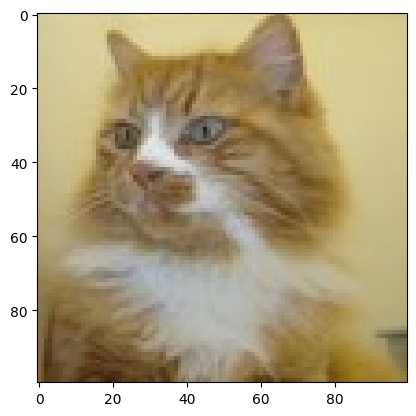

In [231]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()


 #  Model

In [96]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [101]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [185]:
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)


Epoch 1/5
32/32 [==============================] - 8s 258ms/step - loss: 0.0448 - accuracy: 0.9920
Epoch 2/5
32/32 [==============================] - 8s 248ms/step - loss: 0.0351 - accuracy: 0.9945
Epoch 3/5
32/32 [==============================] - 8s 256ms/step - loss: 0.0254 - accuracy: 0.9980
Epoch 4/5
32/32 [==============================] - 8s 253ms/step - loss: 0.0155 - accuracy: 1.0000
Epoch 5/5
32/32 [==============================] - 8s 251ms/step - loss: 0.0118 - accuracy: 1.0000


In [186]:
model.evaluate(X_test, Y_test)

13/13 [==============================] - 0s 22ms/step - loss: 1.3989 - accuracy: 0.6875


[1.3989346027374268, 0.6875]

# Making Prediction

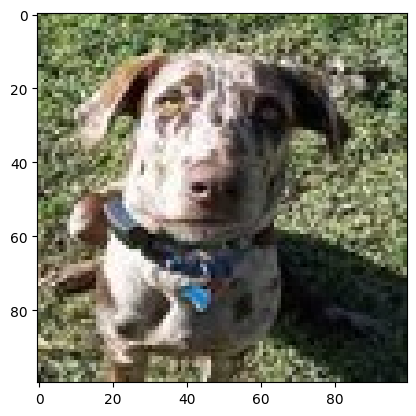

1/1 [==============================] - 0s 28ms/step
[[6.7653687e-09]]
Our model says it is :  dog


In [264]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
print(y_pred)

y_pred = y_pred > 0.4

if y_pred == 0:
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is : ", pred)

